In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
from scipy import signal

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

from sklearn.inspection import permutation_importance
from matplotlib.pyplot import figure
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std

from sklearn import tree
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

save_to = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\06_models\\"

folder = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\04_feature\\"


In [2]:
#pip install imbalanced-learn

In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

In [4]:
def getdf(folder, file):
    data = pd.read_csv(str(folder + file), sep=',')
    return data

In [5]:
result_SeiteA = getdf(folder, "result_SeiteA.csv")
result_SeiteA.set_index("Unnamed: 0")
result_SeiteA.drop(columns=['Unnamed: 0'],inplace=True)
result_SeiteA = shuffle(result_SeiteA)
x_SeiteA = result_SeiteA.iloc[:, :-1].values
y_SeiteA = result_SeiteA.iloc[:, len(result_SeiteA.columns)-1].values

result1000_SeiteA = getdf(folder, "result1000_SeiteA.csv")
result1000_SeiteA.set_index("Unnamed: 0")
result1000_SeiteA.drop(columns=['Unnamed: 0'],inplace=True)
result1000_SeiteA = shuffle(result1000_SeiteA)
x1000_SeiteA = result1000_SeiteA.iloc[:, :-1].values
y1000_SeiteA = result1000_SeiteA.iloc[:, len(result1000_SeiteA.columns)-1].values

result2000 = getdf(folder, "result2000.csv")
result2000.set_index("Unnamed: 0")
result2000.drop(columns=['Unnamed: 0'],inplace=True)
result2000 = shuffle(result2000)
x2000 = result2000.iloc[:, :-1].values
y2000 = result2000.iloc[:, len(result2000.columns)-1].values

In [6]:
#nächste Nachbarn für knn & Größe der Testmenge für train_test_split
#knn
nneighbors = 30 #default 5
p = 1 #default 2
leaf_size= 70 # default 30, best 70 or 40
weights = 'uniform' # or distance

test_size = 0.2 #default 0.33

In [7]:
result2000

,260.7017543859649,277.89473684210526,295.0877192982456,312.2807017543859,329.4736842105263,346.66666666666663,363.859649122807,381.05263157894734,398.24561403508767,415.43859649122805,432.6315789473684,Label
3304,14399.874722,35450.233568,29992.571297,24039.394418,34613.514543,32170.263816,6236.993587,9809.704634,20738.985631,30095.976741,29547.449365,alt
1683,14839.629544,41887.277603,24072.581457,13972.321819,23268.939318,39189.231276,24336.772711,17133.495849,20172.617207,26210.048169,31110.182577,neu
3357,14497.573763,36964.201520,28715.418332,22987.957630,33701.916296,32669.453041,6757.526545,9862.151996,20662.002323,29898.240350,29415.474584,alt
559,13337.120116,27233.103918,18862.512691,26247.749865,20043.640787,29723.238720,12302.395742,5712.617964,10690.321090,21298.995516,31048.440106,neu
937,13852.513310,29781.538056,28089.323684,31649.781879,25704.736139,24071.255638,9921.029483,14567.864394,3431.140044,23169.163170,31170.793076,neu
...,...,...,...,...,...,...,...,...,...,...,...,...
2250,16042.652929,33714.842221,30626.908496,24547.603916,40814.166021,12537.338832,11505.303690,16576.939917,14861.122569,13040.359389,14719.147428,alt
1166,13802.847279,39913.789597,25872.354609,17296.784672,33560.184415,24234.234504,10445.878852,15502.060798,3405.603764,21887.682472,29518.365216,neu
1729,14735.545324,41730.177438,24511.836182,14288.524941,23526.764610,38975.812089,24594.994064,17009.350664,19835.724791,25755.865138,30636.145254,neu
68,13183.518688,35165.530424,31317.786448,23823.117281,32519.188489,36189.648036,11389.728223,4575.002732,9184.319518,19940.272942,30292.255594,neu


In [8]:
X_train_SeiteA, X_test_SeiteA, y_train_SeiteA, y_test_SeiteA = train_test_split(x_SeiteA, y_SeiteA, test_size=test_size, stratify=y_SeiteA)
print(X_train_SeiteA.shape, X_test_SeiteA.shape, y_train_SeiteA.shape, y_test_SeiteA.shape)
X_train1000_SeiteA, X_test1000_SeiteA, y_train1000_SeiteA, y_test1000_SeiteA = train_test_split(x1000_SeiteA, y1000_SeiteA, test_size=test_size, stratify=y1000_SeiteA)
print(X_train1000_SeiteA.shape, X_test1000_SeiteA.shape, y_train1000_SeiteA.shape, y_test1000_SeiteA.shape)
X_train2000, X_test2000, y_train2000, y_test2000 = train_test_split(x2000, y2000, test_size=test_size, stratify=y2000)
print(X_train2000.shape, X_test2000.shape, y_train2000.shape, y_test2000.shape)

scaler = StandardScaler()
scaler.fit(X_train_SeiteA)
X_train_SeiteA = scaler.transform(X_train_SeiteA)
X_test_SeiteA = scaler.transform(X_test_SeiteA)

scaler.fit(X_train1000_SeiteA)
X_train1000_SeiteA = scaler.transform(X_train1000_SeiteA)
X_test1000_SeiteA = scaler.transform(X_test1000_SeiteA)

scaler.fit(X_train2000)
X_train2000 = scaler.transform(X_train2000)
X_test2000 = scaler.transform(X_test2000)

#print("before oversampling",len(X_train))
#ros = RandomOverSampler(random_state=1)
#ros = ClusterCentroids(random_state=1)
#X_train, y_train = ros.fit_resample(X_train, y_train)
#X_train1000, y_train1000 = ros.fit_resample(X_train1000, y_train1000)
#X_train2000, y_train2000 = ros.fit_resample(X_train2000, y_train2000)
#print("after oversampling",len(X_train))

# train the model
clf_SeiteA = KNeighborsClassifier(n_neighbors=nneighbors, weights=weights, algorithm='auto', leaf_size=leaf_size, p=p, metric='minkowski', metric_params=None, n_jobs=None)
model_knn_SeiteA = clf_SeiteA.fit(X_train_SeiteA, y_train_SeiteA)

clf_tree_SeiteA = DecisionTreeClassifier(random_state=36,max_features='log2',max_depth=3) # plot the tree, 
model_tree_SeiteA = clf_tree_SeiteA.fit(X_train_SeiteA, y_train_SeiteA)

model_svm_SeiteA = SVC(kernel='rbf')
model_svm_SeiteA.fit(X_train_SeiteA, y_train_SeiteA)

# train the model
clf1000_SeiteA = KNeighborsClassifier(n_neighbors=nneighbors, weights=weights, algorithm='auto', leaf_size=leaf_size, p=p, metric='minkowski', metric_params=None, n_jobs=None) # 1,3 or 5 neighnors
model_knn1000_SeiteA = clf1000_SeiteA.fit(X_train1000_SeiteA, y_train1000_SeiteA)

# random_state=42 or 79(when all 58 features considered) to force the below model to get trained on feature 415
clf_tree1000_SeiteA = DecisionTreeClassifier(random_state=42,max_features='log2',max_depth=3)
model_tree1000_SeiteA = clf_tree1000_SeiteA.fit(X_train1000_SeiteA, y_train1000_SeiteA)

model_svm1000_SeiteA = SVC(kernel='rbf')
model_svm1000_SeiteA.fit(X_train1000_SeiteA, y_train1000_SeiteA)

# train the model
clf2000 = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='auto', leaf_size=1, p=p, metric='minkowski', metric_params=None, n_jobs=None) # 1,3 or 5 neighnors
model_knn2000 = clf2000.fit(X_train2000, y_train2000)

# random_state=1 to force the below model to get trained on feature 914
clf_tree2000 = DecisionTreeClassifier(random_state=868686,max_features='log2',max_depth=3)
model_tree2000 = clf_tree2000.fit(X_train2000, y_train2000)

model_svm2000 = SVC(C=0.8, gamma=0.00005, kernel='rbf', random_state=979247) # random_state=3
model_svm2000.fit(X_train2000, y_train2000)
#print(len(X_train),len(X_test))

clf_forest_SeiteA = RandomForestClassifier(random_state=868686, min_samples_split=100, n_estimators=16)
model_forest_SeiteA = clf_forest_SeiteA.fit(X_train_SeiteA, y_train_SeiteA)
clf_forest1000_SeiteA = RandomForestClassifier(random_state=14, min_samples_split=100, n_estimators=16)
model_forest1000_SeiteA = clf_forest1000_SeiteA.fit(X_train1000_SeiteA, y_train1000_SeiteA)
clf_forest2000 = RandomForestClassifier(random_state=868686, min_samples_split=100, n_estimators=16)
model_forest2000 = clf_forest2000.fit(X_train2000, y_train2000)

hyp_tun = False

if hyp_tun:
    #List Hyperparameters that we want to tune.
    leaf_size = list(range(1,50))
    n_neighbors = list(range(1,30))
    p=[1,2]#Convert to dictionary
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)#Create new KNN object
    knn_2 = KNeighborsClassifier()#Use GridSearch
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)#Fit the model
    best_model = clf.fit(X_train2000, y_train2000)
    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

    # defining parameter range
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}

    grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

    # fitting the model for grid search
    grid.fit(X_train2000, y_train2000)
    # print best parameter after tuning
    print(grid.best_params_)

    # print how our model looks after hyper-parameter tuning
    print(grid.best_estimator_)
    param_grid = {'max_depth': [3, 5, 10, 18],'min_samples_split': [2, 5, 10, 100]}
    base_estimator = RandomForestClassifier(random_state=139)

    sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                              factor=2, resource='n_estimators',
                              max_resources=30).fit(X_train1000_SeiteA, y_train1000_SeiteA)
    print(sh.best_estimator_)

    base_estimator = RandomForestClassifier(random_state=14)

    sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                              factor=2, resource='n_estimators',
                              max_resources=30).fit(X_train2000, y_train2000)
    print(sh.best_estimator_)
        
    #List Hyperparameters that we want to tune.
    leaf_size = list(range(1,50))
    n_neighbors = list(range(1,30))
    p=[1,2]#Convert to dictionary
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
    knn_2 = KNeighborsClassifier()
    clf = GridSearchCV(knn_2, hyperparameters, cv=10)#Fit the model
    best_model = clf.fit(X_train1000_SeiteA,y_train1000_SeiteA)#Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

(6069, 11) (1518, 11) (6069,) (1518,)
(3168, 11) (793, 11) (3168,) (793,)
(2900, 11) (726, 11) (2900,) (726,)


In [9]:
print(model_forest_SeiteA.get_params(deep=True))
print(model_forest1000_SeiteA.get_params(deep=True))
print(model_forest2000.get_params(deep=True))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 868686, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 16, 'n_jobs': None, 'oob_score': False, 'random_state': 14, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_

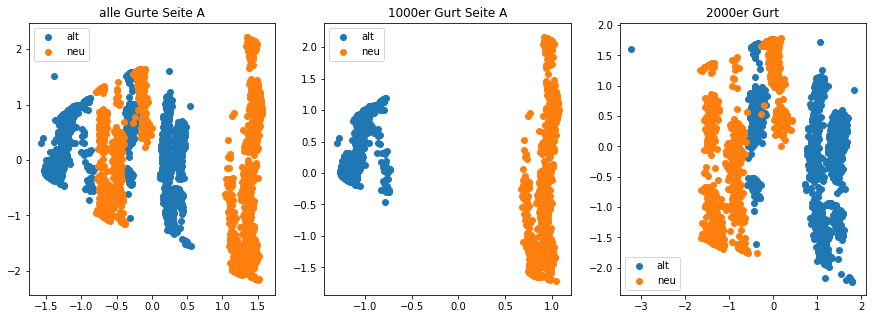

In [10]:
plt.rcParams['figure.figsize'] = [15, 5]

plt.subplot(1, 3, 1)
X_set_SeiteA, y_set_SeiteA = X_train_SeiteA, y_train_SeiteA
for i,j in enumerate(np.unique(y_set_SeiteA)):
    plt.scatter(X_set_SeiteA[y_set_SeiteA==j,0],X_set_SeiteA[y_set_SeiteA==j,1],label = j) 
plt.title("alle Gurte Seite A")
plt.legend()

plt.subplot(1, 3, 2)
X_set1000_SeiteA, y_set1000_SeiteA = X_train1000_SeiteA, y_train1000_SeiteA
for i,j in enumerate(np.unique(y_set1000_SeiteA)):
    plt.scatter(X_set1000_SeiteA[y_set1000_SeiteA==j,0],X_set1000_SeiteA[y_set1000_SeiteA==j,1],label = j)
plt.title("1000er Gurt Seite A")
plt.legend()

plt.subplot(1, 3, 3)
X_set2000, y_set2000 = X_train2000, y_train2000
for i,j in enumerate(np.unique(y_set2000)):
    plt.scatter(X_set2000[y_set2000==j,0],X_set2000[y_set2000==j,1],label = j)
plt.title("2000er Gurt")
plt.legend()

plt.show()
# Did not understand thge below graph/distribution. What are these x and y-axis values?
# I believe these graphs only indicate how well each feature separates the alt and neu datasets
# Maybe I will have to manually check each and every feature 

In [11]:
y_pred_knn_SeiteA = model_knn_SeiteA.predict(X_test_SeiteA)
print(confusion_matrix(y_test_SeiteA, y_pred_knn_SeiteA))
print(classification_report(y_test_SeiteA, y_pred_knn_SeiteA))

y_pred_tree_SeiteA = model_tree_SeiteA.predict(X_test_SeiteA)
print(confusion_matrix(y_test_SeiteA, y_pred_tree_SeiteA))
print(classification_report(y_test_SeiteA, y_pred_tree_SeiteA))

y_pred_svm_SeiteA = model_svm_SeiteA.predict(X_test_SeiteA)
print(confusion_matrix(y_test_SeiteA, y_pred_svm_SeiteA))
print(classification_report(y_test_SeiteA, y_pred_svm_SeiteA))

y_pred_forest_SeiteA = model_forest_SeiteA.predict(X_test_SeiteA)
print(confusion_matrix(y_test_SeiteA, y_pred_forest_SeiteA))
print(classification_report(y_test_SeiteA, y_pred_forest_SeiteA))
# How come the below results are 100% accurate? Is it because I am using test set for training instead of the training set?
# We are anyway spliting the dataset in the above cell for training and testing

[[726   1]
 [  0 791]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       727
         neu       1.00      1.00      1.00       791

    accuracy                           1.00      1518
   macro avg       1.00      1.00      1.00      1518
weighted avg       1.00      1.00      1.00      1518

[[662  65]
 [ 13 778]]
              precision    recall  f1-score   support

         alt       0.98      0.91      0.94       727
         neu       0.92      0.98      0.95       791

    accuracy                           0.95      1518
   macro avg       0.95      0.95      0.95      1518
weighted avg       0.95      0.95      0.95      1518

[[726   1]
 [  0 791]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       727
         neu       1.00      1.00      1.00       791

    accuracy                           1.00      1518
   macro avg       1.00      1.00      1.00      1518
weigh

In [12]:
y_pred_knn1000_SeiteA = model_knn1000_SeiteA.predict(X_test1000_SeiteA)
print(confusion_matrix(y_test1000_SeiteA, y_pred_knn1000_SeiteA))
print(classification_report(y_test1000_SeiteA, y_pred_knn1000_SeiteA))

y_pred_tree1000_SeiteA = model_tree1000_SeiteA.predict(X_test1000_SeiteA)
print(confusion_matrix(y_test1000_SeiteA, y_pred_tree1000_SeiteA))
print(classification_report(y_test1000_SeiteA, y_pred_tree1000_SeiteA))

y_pred_svm1000_SeiteA = model_svm1000_SeiteA.predict(X_test1000_SeiteA)
print(confusion_matrix(y_test1000_SeiteA, y_pred_svm1000_SeiteA))
print(classification_report(y_test1000_SeiteA, y_pred_svm1000_SeiteA))

y_pred_forest1000_SeiteA = model_forest1000_SeiteA.predict(X_test1000_SeiteA)
print(confusion_matrix(y_test1000_SeiteA, y_pred_forest1000_SeiteA))
print(classification_report(y_test1000_SeiteA, y_pred_forest1000_SeiteA))

[[365   0]
 [  0 428]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       365
         neu       1.00      1.00      1.00       428

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weighted avg       1.00      1.00      1.00       793

[[365   0]
 [  0 428]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       365
         neu       1.00      1.00      1.00       428

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weighted avg       1.00      1.00      1.00       793

[[365   0]
 [  0 428]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       365
         neu       1.00      1.00      1.00       428

    accuracy                           1.00       793
   macro avg       1.00      1.00      1.00       793
weigh

In [13]:
y_pred_knn2000 = model_knn2000.predict(X_test2000)
print(confusion_matrix(y_test2000, y_pred_knn2000))
print(classification_report(y_test2000, y_pred_knn2000))

y_pred_tree2000 = model_tree2000.predict(X_test2000)
print(confusion_matrix(y_test2000, y_pred_tree2000))
print(classification_report(y_test2000, y_pred_tree2000))

y_pred_svm2000 = model_svm2000.predict(X_test2000)
print(confusion_matrix(y_test2000, y_pred_svm2000))
print(classification_report(y_test2000, y_pred_svm2000))

y_pred_forest2000 = model_forest2000.predict(X_test2000)
print(confusion_matrix(y_test2000, y_pred_forest2000))
print(classification_report(y_test2000, y_pred_forest2000))

[[363   0]
 [  0 363]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       363
         neu       1.00      1.00      1.00       363

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

[[363   0]
 [  0 363]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       363
         neu       1.00      1.00      1.00       363

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

[[230 133]
 [  0 363]]
              precision    recall  f1-score   support

         alt       1.00      0.63      0.78       363
         neu       0.73      1.00      0.85       363

    accuracy                           0.82       726
   macro avg       0.87      0.82      0.81       726
weigh

In [14]:
# Its important to use binary mode 
# source, destination 
pickle.dump(model_knn_SeiteA, open(save_to + 'model_knn_SeiteA', 'wb'))
pickle.dump(model_tree_SeiteA, open(save_to + 'model_tree_SeiteA', 'wb'))
pickle.dump(model_svm_SeiteA, open(save_to + 'model_svm_SeiteA', 'wb'))
pickle.dump(model_forest_SeiteA, open(save_to + 'model_forest_SeiteA', 'wb'))

pickle.dump(model_knn1000_SeiteA, open(save_to + 'model_knn1000_SeiteA', 'wb'))
pickle.dump(model_tree1000_SeiteA, open(save_to + 'model_tree1000_SeiteA', 'wb'))
pickle.dump(model_svm1000_SeiteA, open(save_to + 'model_svm1000_SeiteA', 'wb'))
pickle.dump(model_forest1000_SeiteA, open(save_to + 'model_forest1000_SeiteA', 'wb'))

pickle.dump(model_knn2000, open(save_to + 'model_knn2000', 'wb'))
pickle.dump(model_tree2000, open(save_to + 'model_tree2000', 'wb'))
pickle.dump(model_svm2000, open(save_to + 'model_svm2000', 'wb'))
pickle.dump(model_forest2000, open(save_to + 'model_forest2000', 'wb'))

Feature: 260.7017543859649, Score: 0.00000
Feature: 277.89473684210526, Score: 0.01893
Feature: 295.0877192982456, Score: 0.00000
Feature: 312.2807017543859, Score: 0.00000
Feature: 329.4736842105263, Score: 0.19371
Feature: 346.66666666666663, Score: 0.01282
Feature: 363.859649122807, Score: 0.00000
Feature: 381.05263157894734, Score: 0.00000
Feature: 398.24561403508767, Score: 0.00000
Feature: 415.43859649122805, Score: 0.77454
Feature: 432.6315789473684, Score: 0.00000


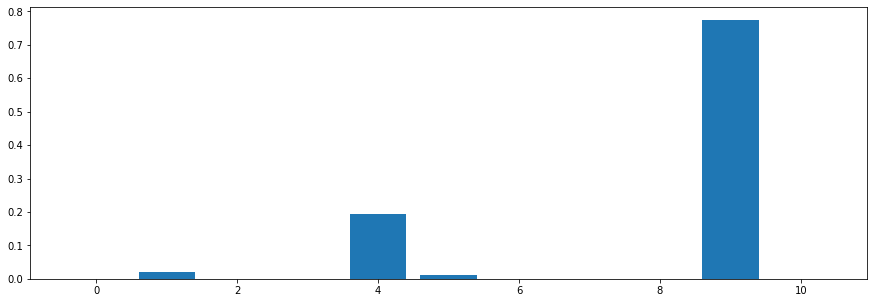

In [15]:
importance_SeiteA = model_tree_SeiteA.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_SeiteA):
	print('Feature: %0s, Score: %.5f' % (result_SeiteA.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_SeiteA))], importance_SeiteA)
plt.show()

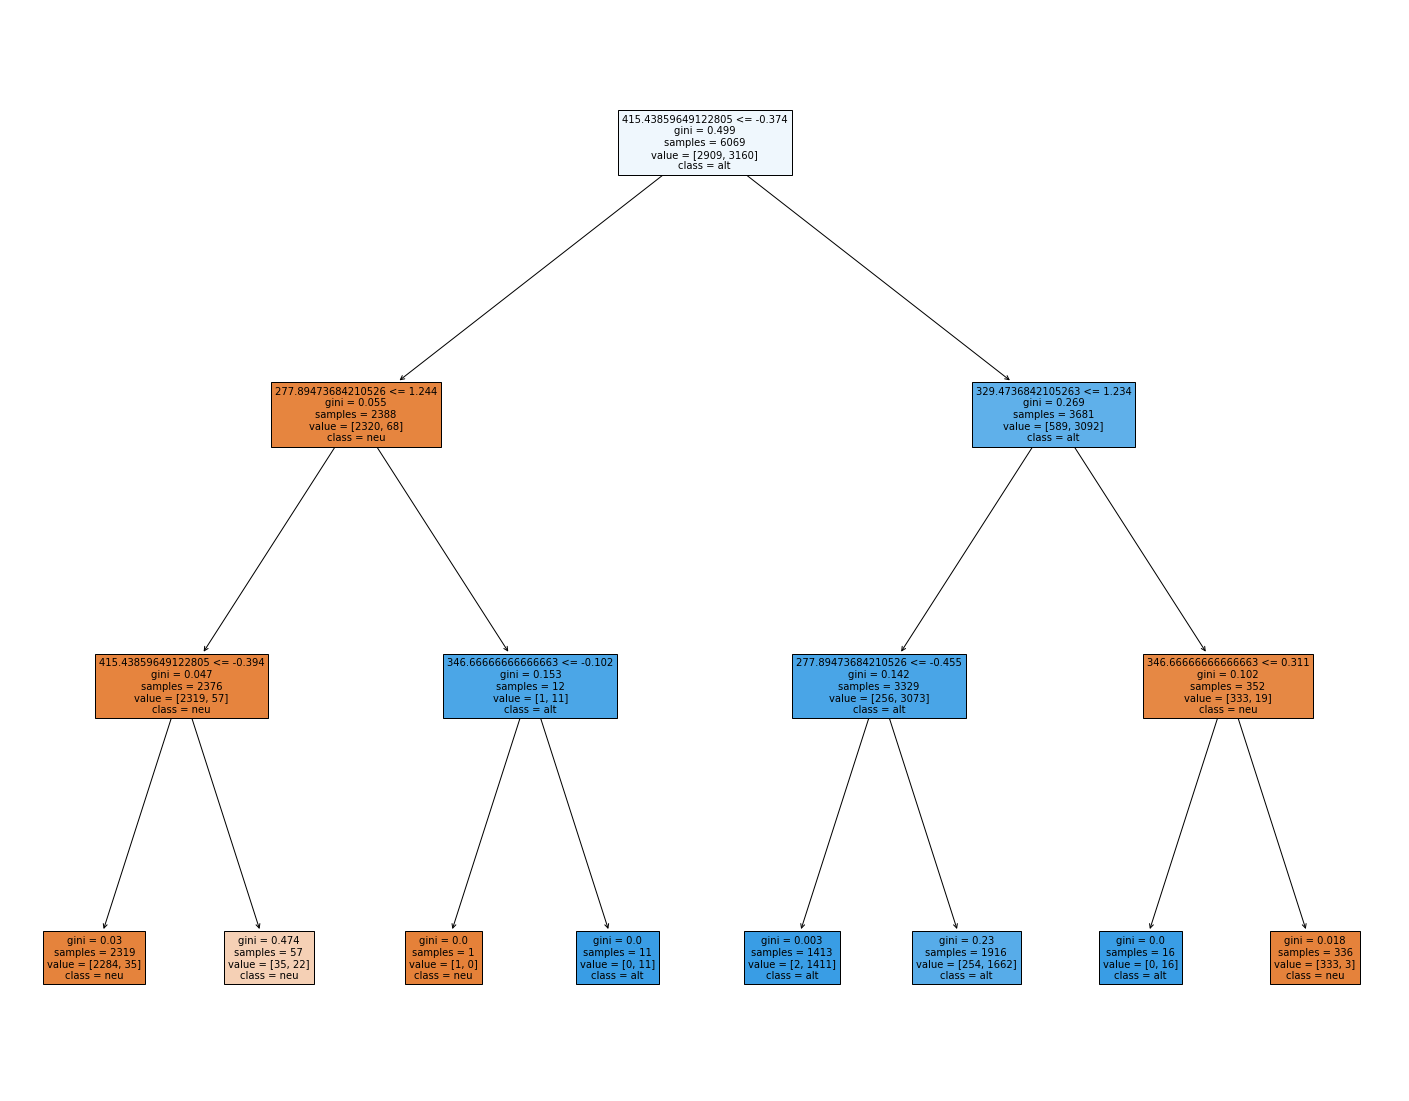

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree_SeiteA, 
                   feature_names=result_SeiteA.columns,  
                   class_names=['neu','alt'],
                   filled=True)

Feature: 260.7017543859649, Score: 0.00000
Feature: 277.89473684210526, Score: 0.00000
Feature: 295.0877192982456, Score: 0.00000
Feature: 312.2807017543859, Score: 0.00000
Feature: 329.4736842105263, Score: 0.00000
Feature: 346.66666666666663, Score: 0.00000
Feature: 363.859649122807, Score: 0.00000
Feature: 381.05263157894734, Score: 0.00000
Feature: 398.24561403508767, Score: 0.00000
Feature: 415.43859649122805, Score: 1.00000
Feature: 432.6315789473684, Score: 0.00000


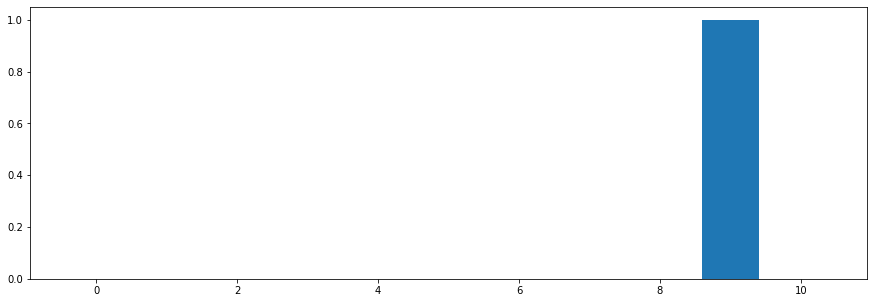

In [17]:
importance_SeiteA = model_tree1000_SeiteA.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_SeiteA):
	print('Feature: %0s, Score: %.5f' % (result1000_SeiteA.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_SeiteA))], importance_SeiteA)
plt.show()

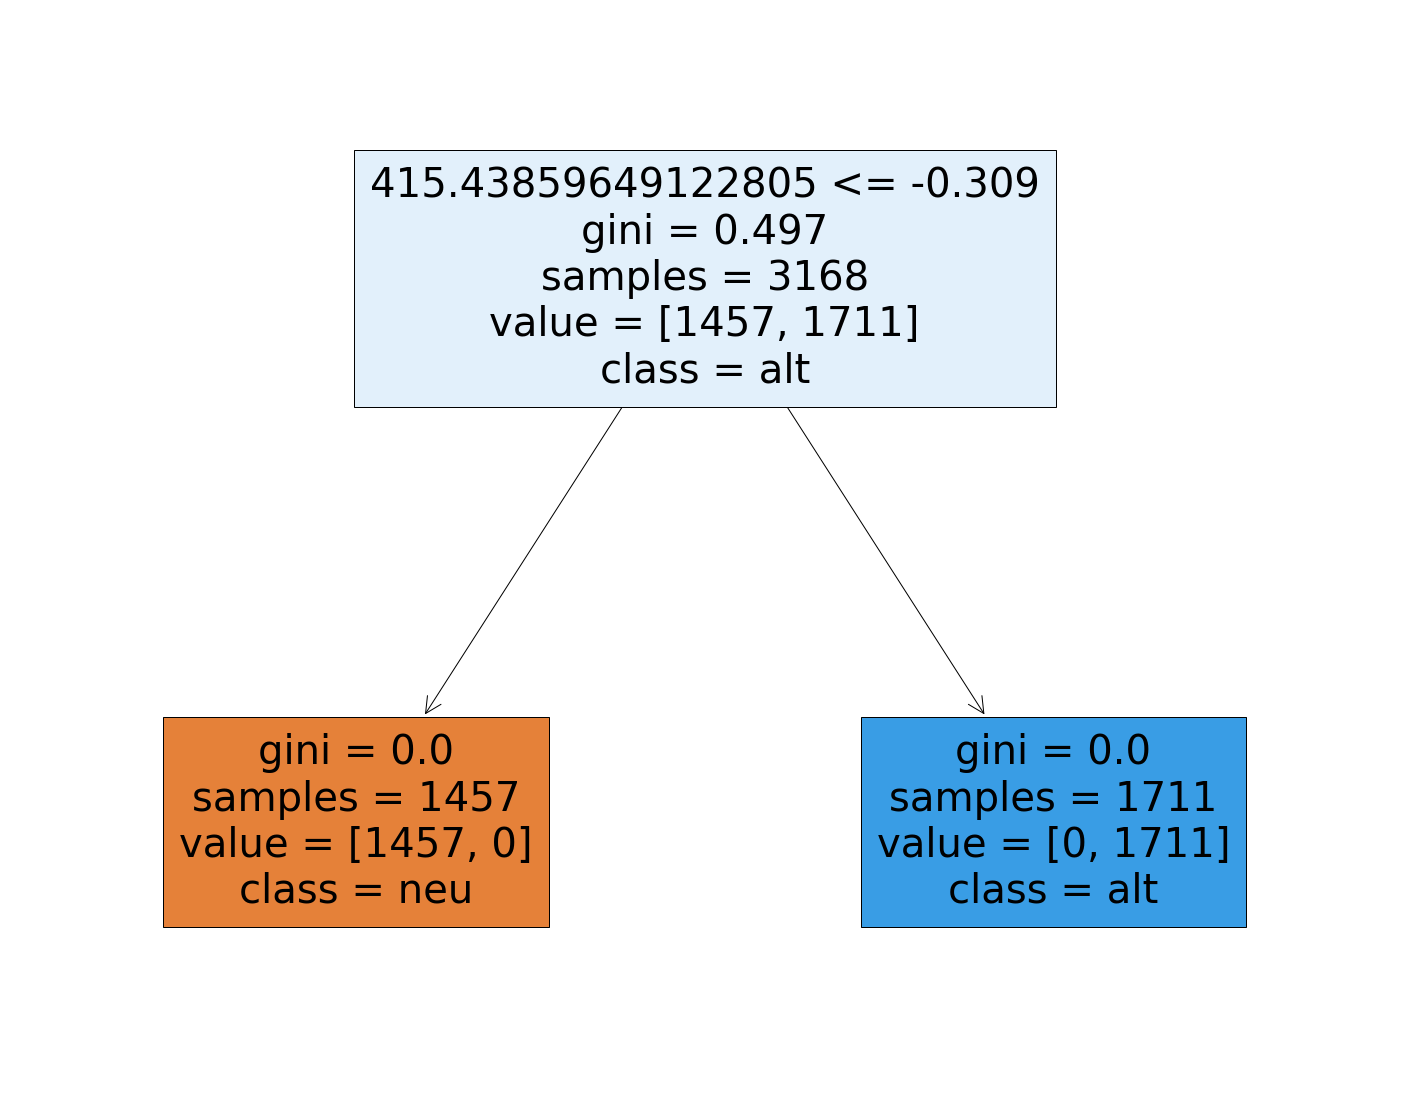

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree1000_SeiteA, 
                   feature_names=result1000_SeiteA.columns,  
                   class_names=['neu','alt'],
                   filled=True)


Feature: 260.7017543859649, Score: 0.06829
Feature: 277.89473684210526, Score: 0.00000
Feature: 295.0877192982456, Score: 0.00000
Feature: 312.2807017543859, Score: 0.00000
Feature: 329.4736842105263, Score: 0.22095
Feature: 346.66666666666663, Score: 0.00000
Feature: 363.859649122807, Score: 0.48630
Feature: 381.05263157894734, Score: 0.00000
Feature: 398.24561403508767, Score: 0.00000
Feature: 415.43859649122805, Score: 0.22447
Feature: 432.6315789473684, Score: 0.00000


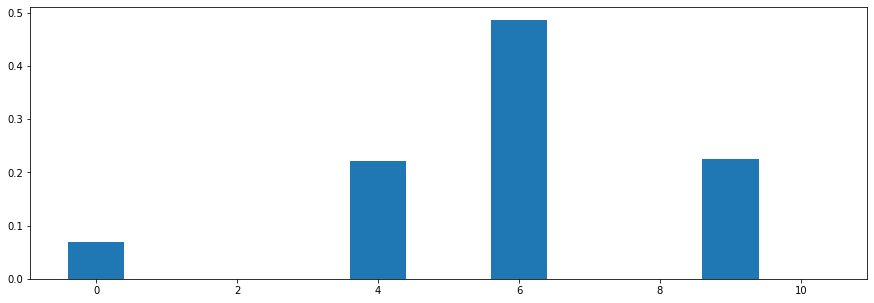

In [19]:
importance = model_tree2000.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (result2000.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

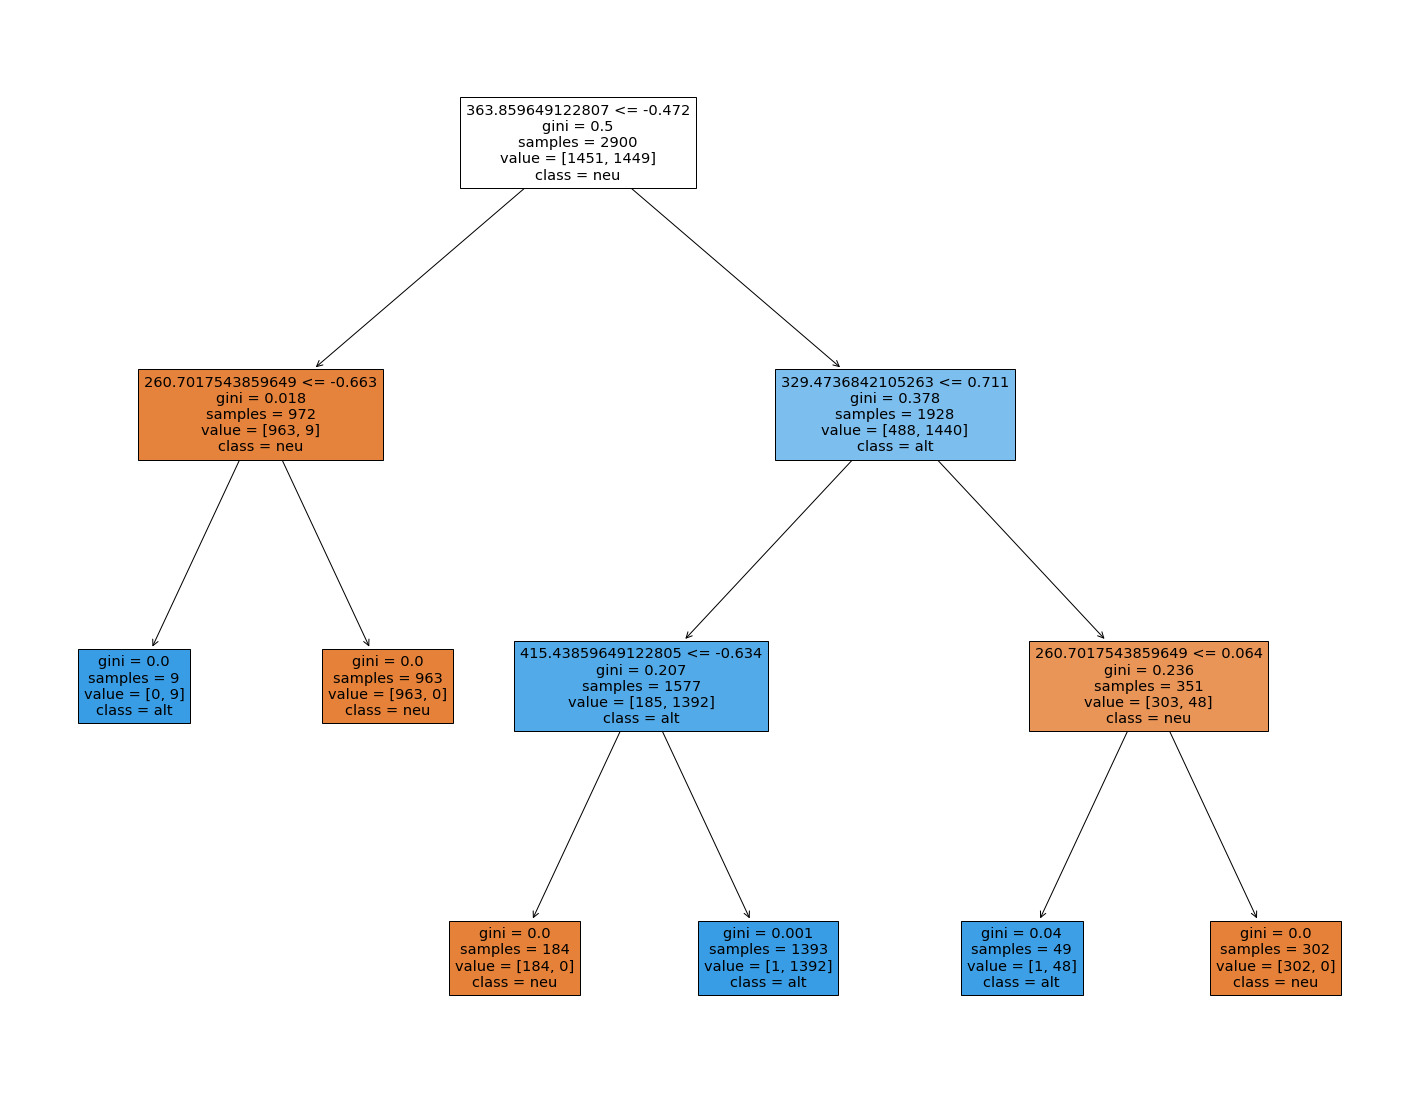

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree2000, 
                   feature_names=result2000.columns,  
                   class_names=['neu','alt'],
                   filled=True)


Feature: 260.7017543859649, Score: 0.12716
Feature: 277.89473684210526, Score: 0.04280
Feature: 295.0877192982456, Score: 0.00489
Feature: 312.2807017543859, Score: 0.00257
Feature: 329.4736842105263, Score: 0.05758
Feature: 346.66666666666663, Score: 0.04618
Feature: 363.859649122807, Score: 0.03158
Feature: 381.05263157894734, Score: 0.23202
Feature: 398.24561403508767, Score: 0.09818
Feature: 415.43859649122805, Score: 0.28895
Feature: 432.6315789473684, Score: 0.06809


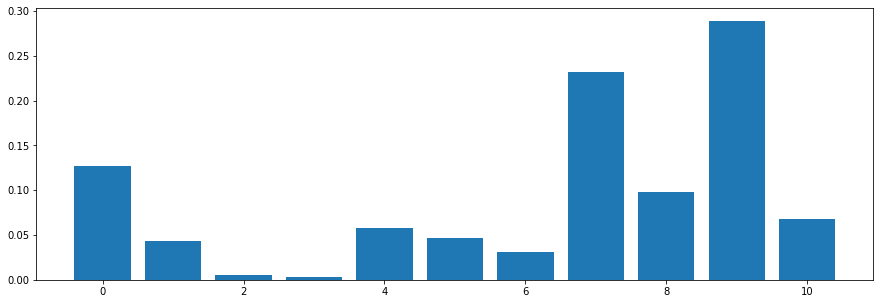

In [21]:
importance_SeiteA = model_forest_SeiteA.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_SeiteA):
	print('Feature: %0s, Score: %.5f' % (result_SeiteA.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_SeiteA))], importance_SeiteA)
plt.show()

Feature: 260.7017543859649, Score: 0.25511
Feature: 277.89473684210526, Score: 0.04198
Feature: 295.0877192982456, Score: 0.00000
Feature: 312.2807017543859, Score: 0.00000
Feature: 329.4736842105263, Score: 0.00000
Feature: 346.66666666666663, Score: 0.02765
Feature: 363.859649122807, Score: 0.01920
Feature: 381.05263157894734, Score: 0.05346
Feature: 398.24561403508767, Score: 0.18750
Feature: 415.43859649122805, Score: 0.38373
Feature: 432.6315789473684, Score: 0.03137


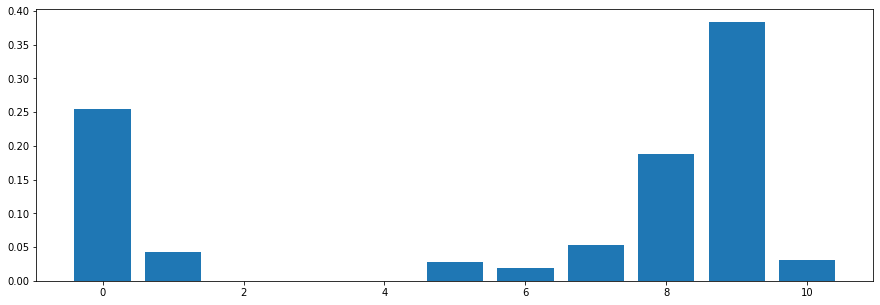

In [22]:
importance_SeiteA = model_forest1000_SeiteA.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_SeiteA):
	print('Feature: %0s, Score: %.5f' % (result1000_SeiteA.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_SeiteA))], importance_SeiteA)
plt.show()

Feature: 260.7017543859649, Score: 0.16019
Feature: 277.89473684210526, Score: 0.00009
Feature: 295.0877192982456, Score: 0.00051
Feature: 312.2807017543859, Score: 0.01346
Feature: 329.4736842105263, Score: 0.06488
Feature: 346.66666666666663, Score: 0.08094
Feature: 363.859649122807, Score: 0.19839
Feature: 381.05263157894734, Score: 0.04151
Feature: 398.24561403508767, Score: 0.07377
Feature: 415.43859649122805, Score: 0.23379
Feature: 432.6315789473684, Score: 0.13248


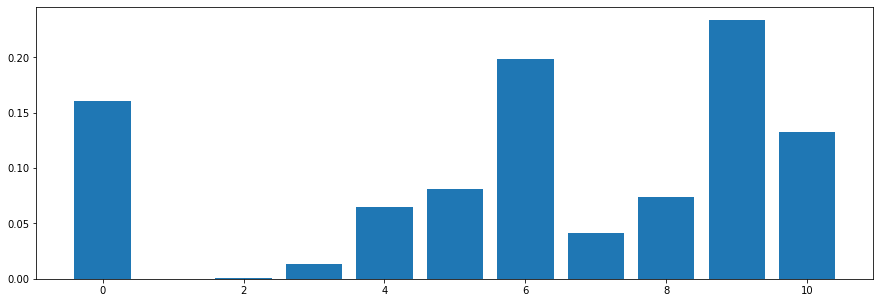

In [23]:
importance = model_forest2000.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (result2000.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Permutation Importance')

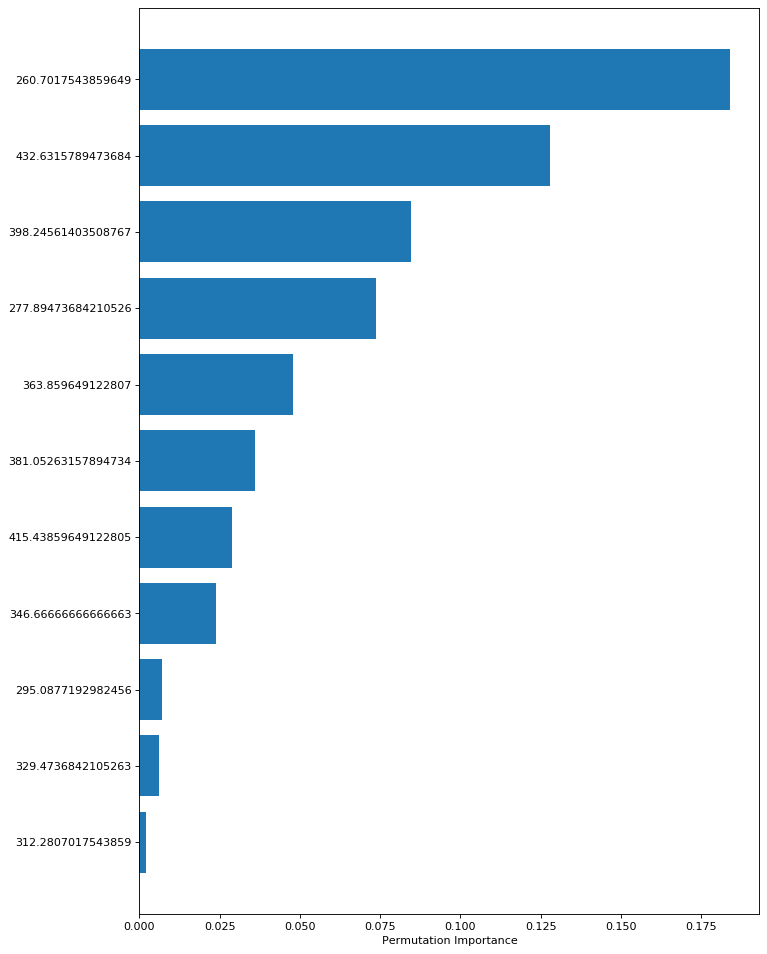

In [24]:
figure(figsize=(10, 15), dpi=80)

perm_importance = permutation_importance(model_svm_SeiteA, X_train_SeiteA, y_train_SeiteA)

feature_names = result_SeiteA.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

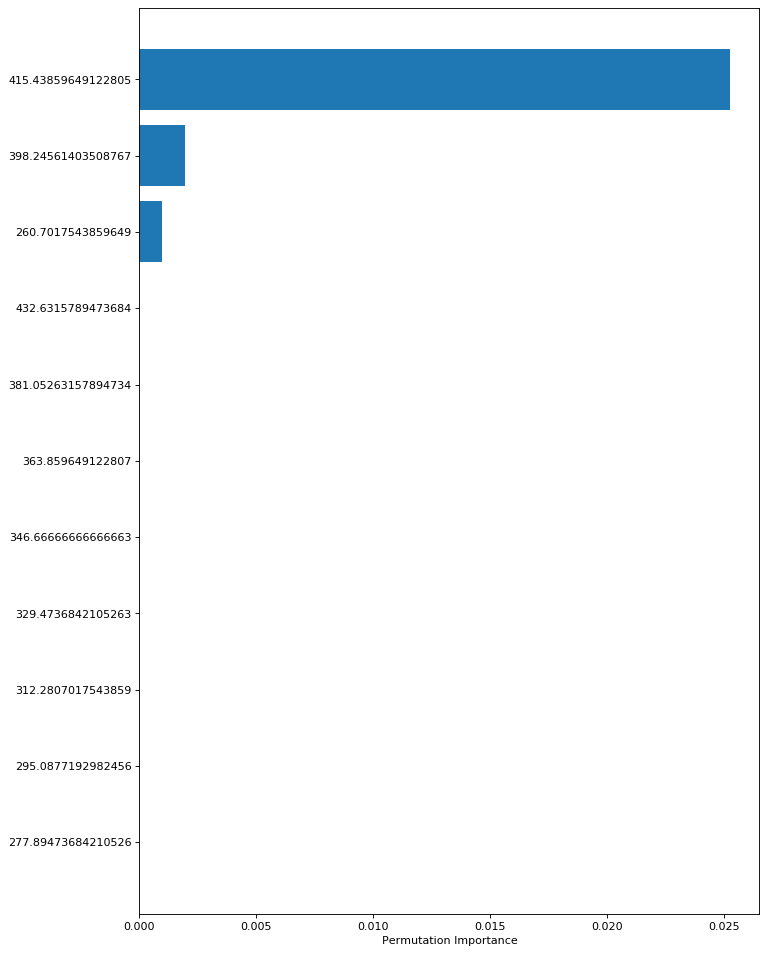

In [25]:
figure(figsize=(10, 15), dpi=80)

perm_importance = permutation_importance(model_svm1000_SeiteA, X_train1000_SeiteA, y_train1000_SeiteA)

feature_names = result1000_SeiteA.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

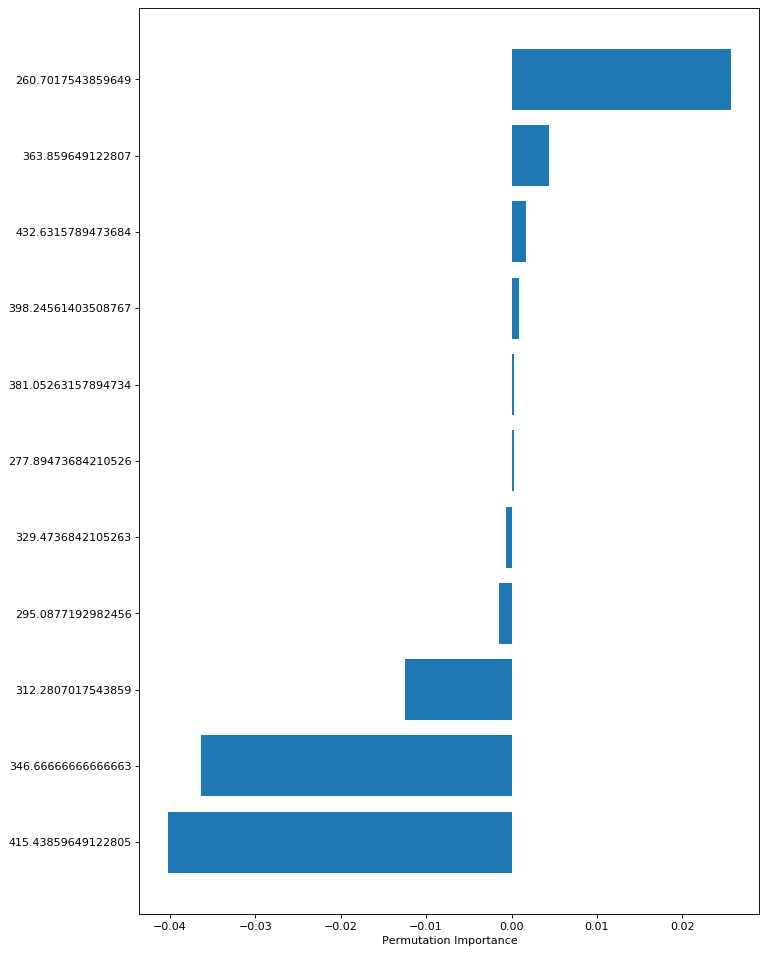

In [26]:
figure(figsize=(10, 15), dpi=80)

perm_importance = permutation_importance(model_svm2000, X_train2000, y_train2000)

feature_names = result2000.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

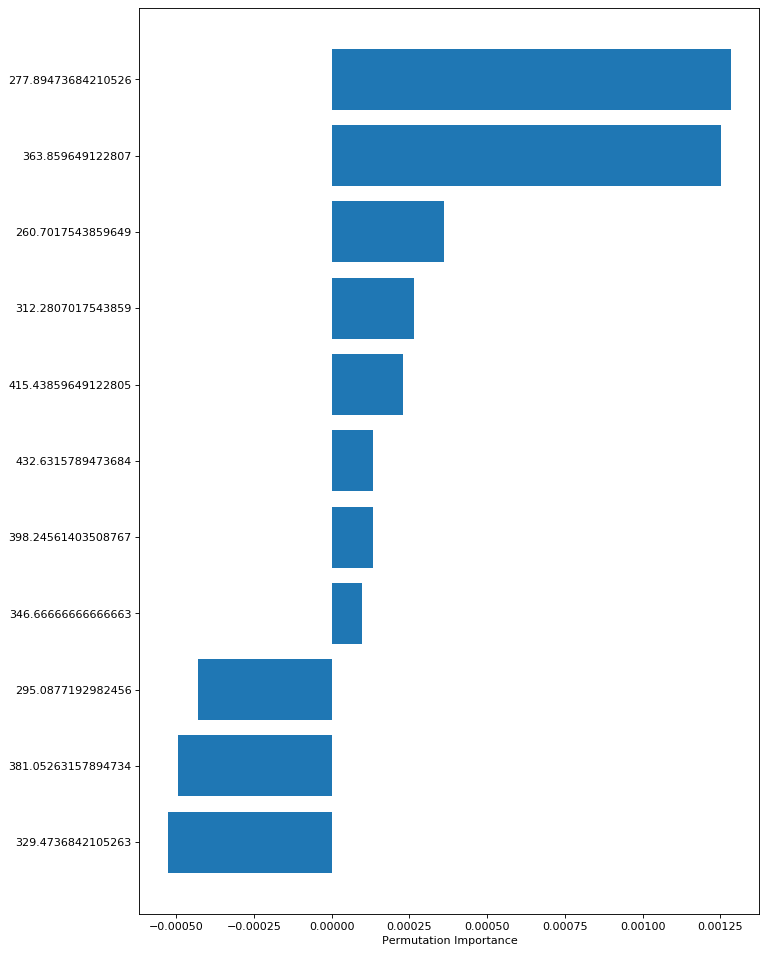

In [27]:
figure(figsize=(10, 15), dpi=80)

perm_importance = permutation_importance(model_knn_SeiteA, X_train_SeiteA, y_train_SeiteA)

feature_names = result_SeiteA.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

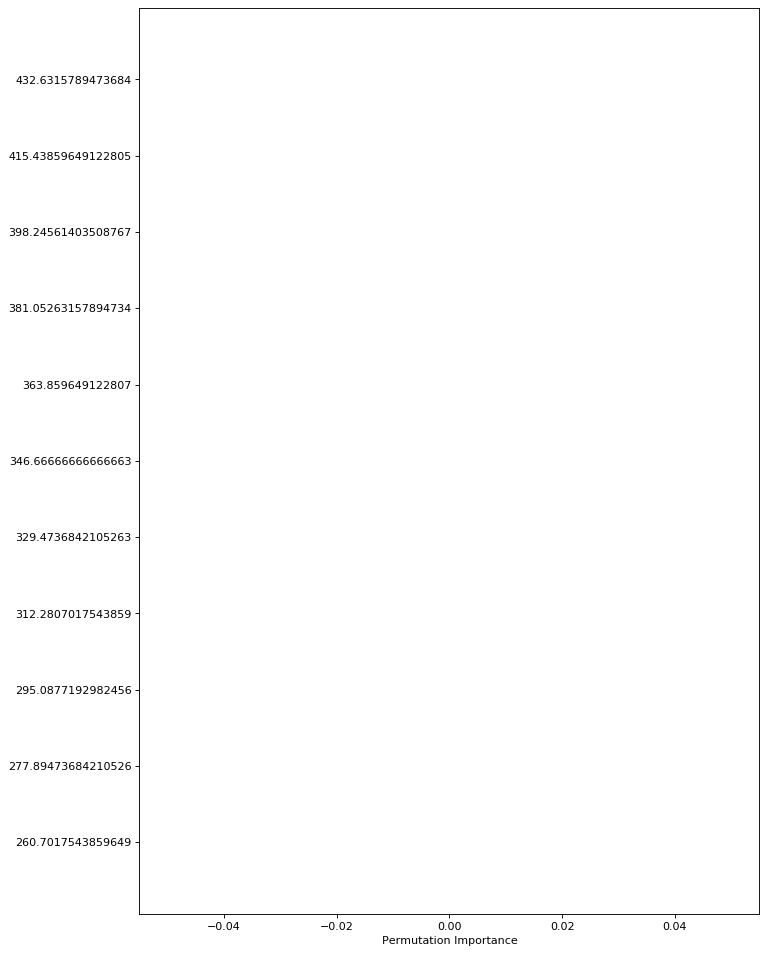

In [28]:
figure(figsize=(10, 15), dpi=80)

perm_importance = permutation_importance(model_knn1000_SeiteA, X_train1000_SeiteA, y_train1000_SeiteA)

feature_names = result1000_SeiteA.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
figure(figsize=(10, 15), dpi=80)

perm_importance = permutation_importance(model_knn2000, X_train2000, y_train2000)

feature_names = result2000.columns
features = np.array(feature_names)
,
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")